# Safest Neighborhood in Pittsburgh based on Police Arrest Data

In [5]:
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv("Pittsburgh-Police-Arrest-Data.csv")

pd.set_option('display.max_rows', None)

# calc total number of arrests in each neighborhood
arrests_in_neighborhoods = data.groupby("INCIDENTNEIGHBORHOOD").size() 


d2 = pd.DataFrame( { "number of crimes" : arrests_in_neighborhoods } )

d2.reset_index(inplace=True)

d2.columns = [ "Number of Arrests" , "Neighborhood"]

print( d2 ) 


              Number of Arrests  Neighborhood
0              Allegheny Center          1227
1                Allegheny West           127
2                     Allentown           930
3                     Arlington           302
4             Arlington Heights           153
5                    Banksville           288
6             Bedford Dwellings           656
7                     Beechview          1167
8                   Beltzhoover           489
9                    Bloomfield           972
10                        Bluff          1463
11                      Bon Air           261
12             Brighton Heights          1095
13                    Brookline          1346
14         California-Kirkbride           304
15                      Carrick          2300
16    Central Business District          4250
17        Central Lawrenceville           425
18           Central North Side           831
19            Central Northside            23
20              Central Oakland   

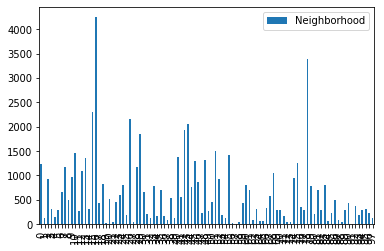

In [18]:
d2.plot(kind="bar")

In [14]:
# import dataset
arrests = pd.read_csv("Pittsburgh-Police-Arrest-Data.csv")
# filter to important info

arrests_in_neighborhoods = data.groupby("INCIDENTNEIGHBORHOOD").size() 


d2 = pd.DataFrame( {"number of crimes" : arrests_in_neighborhoods  } )

d2.reset_index( inplace = True )

d2.columns = [ "Number_of_Arrests" , "Neighborhood" ]



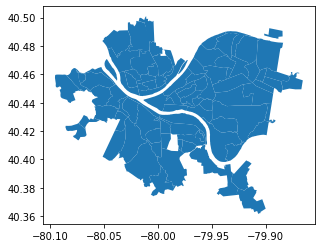

In [61]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe


In [64]:
# do the merge
arrests_map = neighborhoods.merge(d2, how='left', left_on='hood', right_on='Neighborhood')

# Look at the head to confirm it merged correctly
print(arrests_map[['hood', 'Number_of_Arrests', 'geometry']].head())


               hood  Number_of_Arrests  \
0   Central Oakland              512.0   
1     North Oakland              434.0   
2      West Oakland              312.0   
3  Crawford-Roberts              809.0   
4    Strip District              492.0   

                                            geometry  
0  POLYGON ((-79.95304 40.44203, -79.95302 40.442...  
1  POLYGON ((-79.95455 40.45882, -79.95427 40.458...  
2  POLYGON ((-79.96230 40.44294, -79.96220 40.442...  
3  POLYGON ((-79.98275 40.44641, -79.98273 40.446...  
4  POLYGON ((-79.97494 40.45629, -79.97484 40.456...  


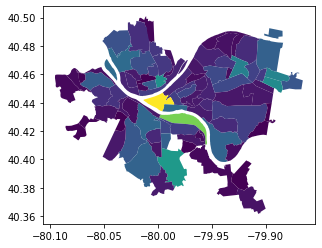

In [65]:
# draw a choropleth map using data from the column named "number_of_steps"
arrests_map.plot(column='Number_of_Arrests')

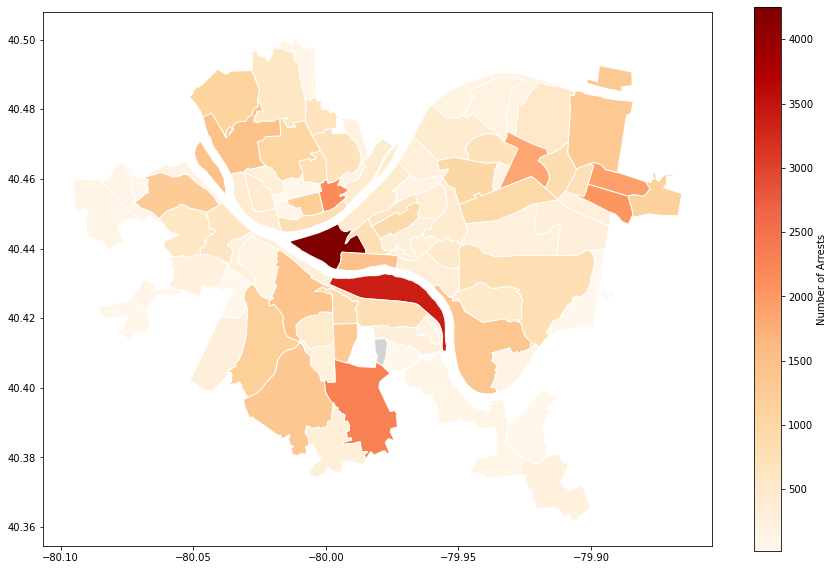

In [66]:
arrests_map.plot(column='Number_of_Arrests', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Arrests"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )